In [1]:
import pprint
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
from utils.neuron import Neuron
from utils.layer import Layer

In [2]:
input_neuron = Neuron(1.22)
n1 = Neuron(input_neuron.input)
n2 = Neuron(input_neuron.input)

[0.67587927 0.75676936]
[0.48822009 0.00325427]
[0.67941795 0.3538697 ]


In [3]:
n1.get_state()

0

In [4]:
n1.feed_forward(input_neuron.signal)
n2.feed_forward(input_neuron.signal)

In [5]:
n1.signal

array([0.46276481, 0.57835553])

In [6]:
print(input_neuron.get_state())
print(n1.get_state())
print(n2.get_state())

0
0.5783555321703436
0.22647130960767808


In [7]:
print('')
pprint.pprint(n1.get_weights())
print('')
pprint.pprint(n2.get_weights())


[array([0.46276481, 0.38328397]),
 array([0.57835553, 0.00246273]),
 array([0.26194409, 0.39128387])]

[array([0.267757 , 0.5557269]),
 array([0.22647131, 0.2728117 ]),
 array([0.57605519, 0.40400267])]


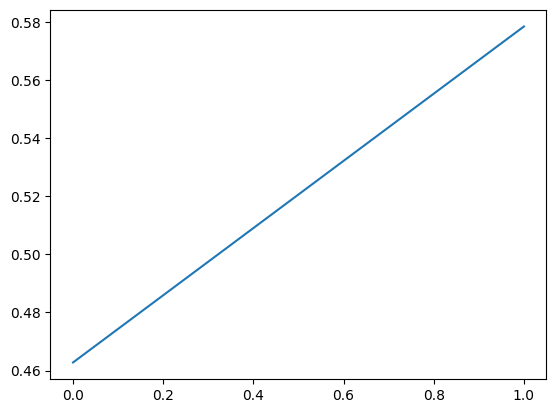

In [8]:
plt.plot(n1.signal)

In [9]:
transducer = Neuron(1.78293)
layer_1 = Layer(12)
layer_1.forward(transducer)
print(layer_1)

[0.35956939 0.5835752 ]
[0.31536148 0.04125614]
[0.29792248 0.66816324]
[0.57880656 0.54954559]
[0.18351083 0.66277603]
[0.41027595 0.73660348]
[0.06525138 0.27942849]
[0.55679058 0.60871274]
[0.73570774 0.53592317]
[0.57707126 0.35313822]
[0.27441455 0.45682915]
[0.55979574 0.08124979]
[0.4328059  0.62213376]


NameError: name 'transducer' is not defined

In [ ]:
for _ in range(12):
    layer_1.forward(layer_1.neurons[0].signal)
    for n in layer_1.neurons:
        plt.plot(n.signal[:-1])

In [ ]:
print(n2.weights)

In [ ]:
plt.plot(n2.signal)